In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ["cnt", "hr", "temp", "hum", "win", "vis", "dew", "rad","rain", "sno", "fun"]
df = pd.read_csv("SBD.csv", encoding='latin1').drop(["Date", "Holiday", "Seasons"], axis=1)

In [ ]:
df.columns = dataset_cols
df["fun"] = (df["fun"]== 'Yes').astype(int)
df = df[df["hr"]==12]
df = df.drop(["hr"], axis=1)
df.head()

,cnt,temp,hum,win,vis,dew,rad,rain,sno,fun
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


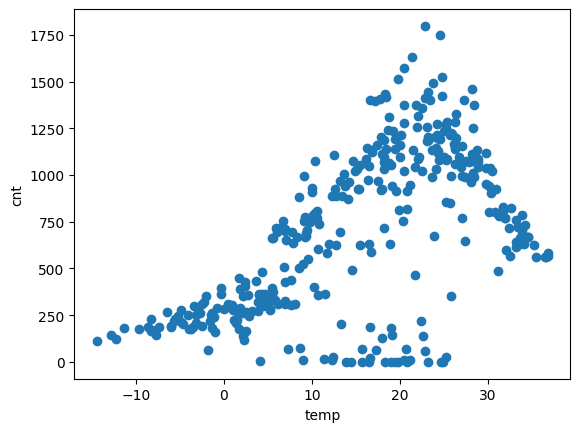

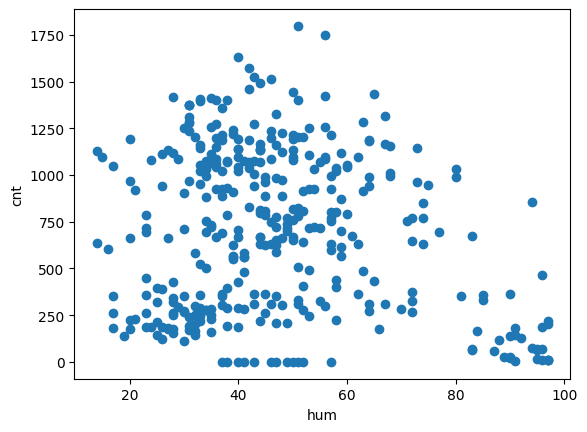

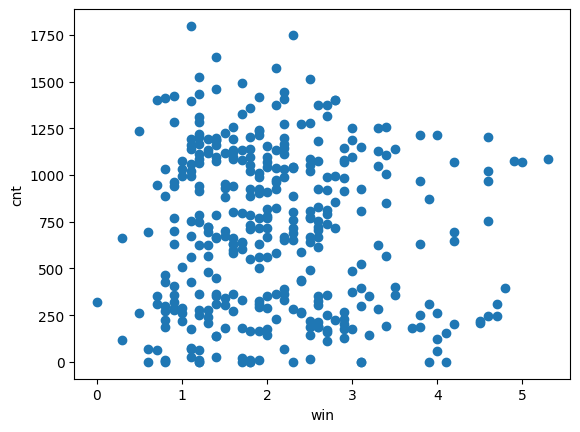

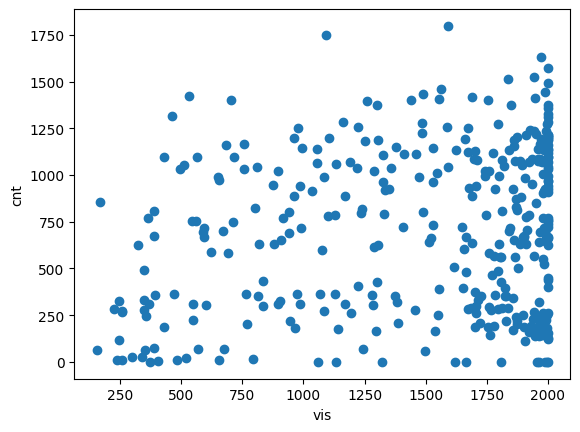

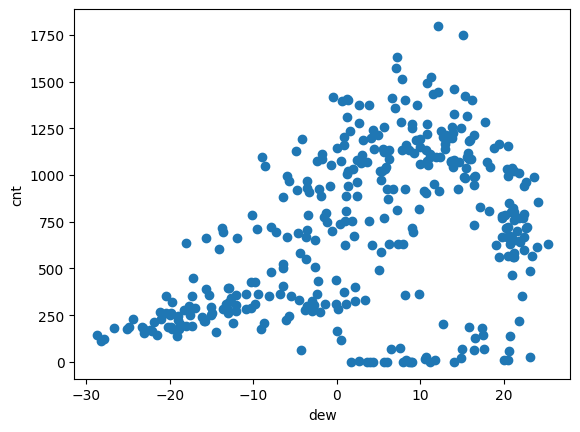

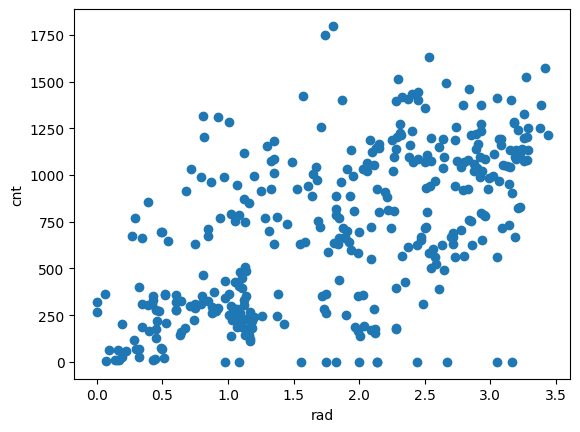

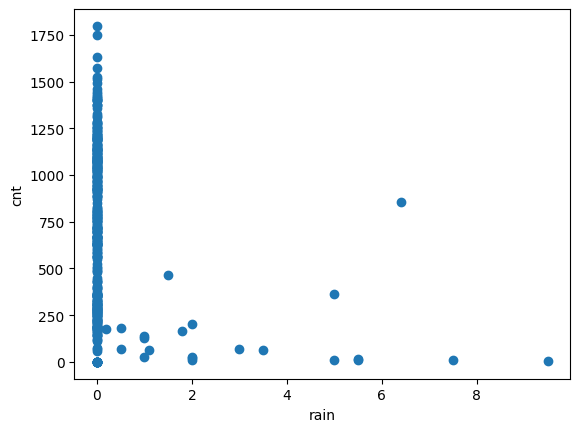

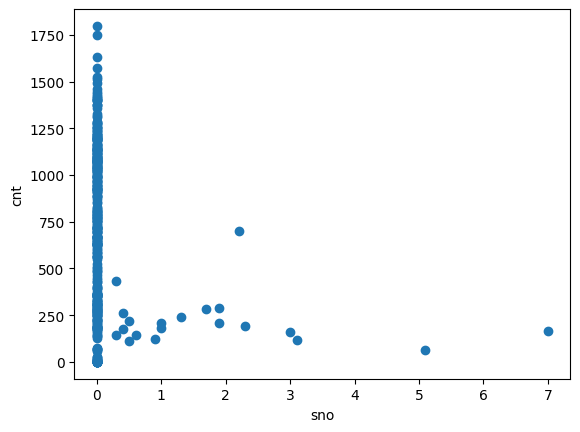

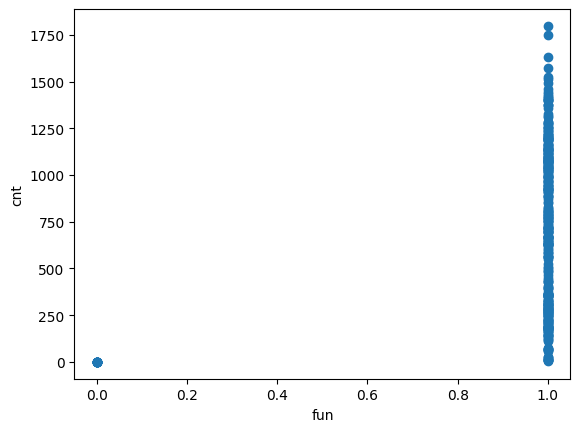

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["cnt"])
  plt.xlabel(label)
  plt.ylabel("cnt")
  plt.show()

In [ ]:
df = df.drop(["win", "vis", "fun"], axis=1)

In [ ]:
df.head()

,cnt,temp,hum,dew,rad,rain,sno
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  if not x_labels:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  Y = dataframe[y_label].values.reshape(-1, 1)
  data=np.hstack((X,Y))
  return data, X, Y


In [ ]:
_, x_train_temp, y_train_temp = get_xy(train, "cnt", x_labels=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "cnt", x_labels=["temp"])
_, x_test_temp, y_test_temp =  get_xy(test, "cnt", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_) #the lines m and c

[[23.54011309]] [345.86804915]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.27537042633622466

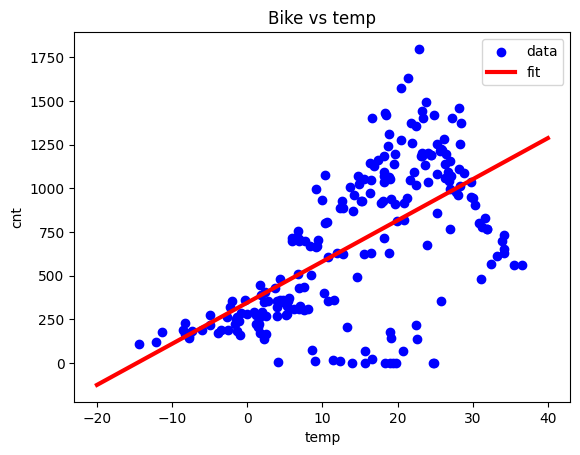

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="data", color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="fit", color='red', linewidth=3)
plt.legend()
plt.title("Bike vs temp")
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()